In [35]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [36]:
pytrends = TrendReq(hl='en-US')

#Získanie súvisiacich dopytov

In [37]:
def related_queries(kw_list):
        try:
            pytrends.build_payload(kw_list=kw_list, timeframe='2019-12-01 2021-07-01',geo='')
            related_queries = pytrends.related_queries()
            related_queries.values()

            top = list(related_queries.values())[0]['top']
            rising = list(related_queries.values())[0]['rising']

            dftop = pd.DataFrame(top)
            dfrising = pd.DataFrame(rising)

            joindfs = [dftop, dfrising]
            allqueries = pd.concat(joindfs, axis=1)

            cols=pd.Series(allqueries.columns)
        except requests.exceptions.Timeout:
                print("timeout")
        for dup in allqueries.columns[allqueries.columns.duplicated(keep=False)]: 
            cols[allqueries.columns.get_loc(dup)] = ([dup + '.' + str(d_idx) 
                                             if d_idx != 0 
                                             else dup 
                                             for d_idx in range(allqueries.columns.get_loc(dup).sum())]
                                             )
        allqueries.columns=cols
        
        allqueries.rename({'query': 'top query', 'value': 'top query value', 'query.1': 'rising query', 'value.1': 'rising query value'}, axis=1, inplace=True) 
        return allqueries

    

In [ ]:
df_list=[
        related_queries(['pandemic']),
        related_queries(['outbreak']),
        related_queries(['epidemic']),
        related_queries(['plague']),
        related_queries(['mortality']),
        related_queries(['pathogen']),
        related_queries(['protest']),
        related_queries(['quarantine']),
        related_queries(['lockdown']),
        related_queries(['michigan']),
        related_queries(['gridlock']),
        related_queries(['risk']), 
        related_queries(['virulence']),
        related_queries(['danger']), 
        related_queries(['hiv']),
        related_queries(['threat']),           
]

In [ ]:
def export_kw(df_list, sheets, file_name, spaces):
    writer = pd.ExcelWriter(file_name,engine='xlsxwriter')   
    row = 0
    for dataframe in df_list:
        dataframe.to_excel(writer,sheet_name=sheets,startrow=row , startcol=0)   
        row = row + len(dataframe.index) + spaces + 1
    writer.save()

In [ ]:
export_kw(df_list,"related queries","keywords.xlsx",1)

In [27]:
true_news = ['coronavirus outbreak', 'the plague', 'mortality rate']
false_news = ['lockdown protest', 'covid quarantine','lockdown news','michigan coronavirus']
partially_news = ['high risk covid','covid virulence','covid hiv','coronavirus threat']
true_partially_news = ['the pandemic', 'pandemic epidemic']

In [59]:
pytrends.build_payload(true_news, timeframe='2019-12-01 2021-07-01')
iotime_t_1 = pytrends.interest_over_time()
iotime_t_1 = iotime_t_1.drop(['isPartial'],axis=1)
iotime_t_1 = iotime_t_1.reset_index()

pytrends.build_payload(false_news, timeframe='2019-12-01 2021-07-01')
iotime_t_2 = pytrends.interest_over_time()
iotime_t_2 = iotime_t_2.drop(['isPartial'],axis=1)
iotime_t_2 = iotime_t_2.reset_index()

pytrends.build_payload(partially_news, timeframe='2019-12-01 2021-07-01')
iotime_t_3 = pytrends.interest_over_time()
iotime_t_3 = iotime_t_3.drop(['isPartial'],axis=1)
iotime_t_3 = iotime_t_3.reset_index()

pytrends.build_payload(true_partially_news, timeframe='2019-12-01 2021-07-01')
iotime_t_4 = pytrends.interest_over_time()
iotime_t_4 = iotime_t_4.drop(['isPartial'],axis=1)
iotime_t_4 = iotime_t_4.reset_index()


In [63]:
fig = go.Figure()
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("True", "False", "Partially","Partially & True"))

for i in range(1, len(iotime_t_1.columns)):
   col_name = iotime_t_1.columns[i]
   fig.add_trace(go.Scatter(x=iotime_t_1['date'], y=iotime_t_1[col_name], mode='lines', name=col_name), row=1, col=1)

for i in range(1, len(iotime_t_2.columns)):
   col_name = iotime_t_2.columns[i]
   fig.add_trace(go.Scatter(x=iotime_t_2['date'], y=iotime_t_2[col_name], mode='lines', name=col_name), row=1, col=2)

for i in range(1, len(iotime_t_3.columns)):
   col_name = iotime_t_3.columns[i]
   fig.add_trace(go.Scatter(x=iotime_t_3['date'], y=iotime_t_3[col_name], mode='lines', name=col_name), row=2, col=1)

for i in range(1, len(iotime_t_4.columns)):
   col_name = iotime_t_4.columns[i]
   fig.add_trace(go.Scatter(x=iotime_t_4['date'], y=iotime_t_4[col_name], mode='lines', name=col_name), row=2, col=2)


fig.update_layout(height=600,title_text="Miera popularity")
fig.show()

In [58]:
fig = px.line(iotime_t_4, x="date", y=true_news, title='Partially news & True news',width=700)
fig.show()

## Záujem o kľúčové slová z jednotlivých kategórií v krajinách

In [61]:
pytrends.build_payload(true_news, timeframe='2019-12-01 2021-07-01')
region_t_1 = pytrends.interest_by_region(inc_low_vol=False, inc_geo_code=False)
region_t_1 = region_t_1[(region_t_1 != 0).all(1)]
region_t_1.dropna(how='all',axis=0, inplace=True)

pytrends.build_payload(false_news, timeframe='2019-12-01 2021-07-01')
region_t_2 = pytrends.interest_by_region(inc_low_vol=False, inc_geo_code=False)
region_t_2 = region_t_2[(region_t_2 != 0).all(1)]
region_t_2.dropna(how='all',axis=0, inplace=True)

pytrends.build_payload(partially_news, timeframe='2019-12-01 2021-07-01')
region_t_3 = pytrends.interest_by_region(inc_low_vol=False, inc_geo_code=False)
region_t_3 = region_t_3[(region_t_3 != 0).all(1)]
region_t_3.dropna(how='all',axis=0, inplace=True)

pytrends.build_payload(true_partially_news, timeframe='2019-12-01 2021-07-01')
region_t_4 = pytrends.interest_by_region(inc_low_vol=False, inc_geo_code=False)
region_t_4 = region_t_4[(region_t_4 != 0).all(1)]
region_t_4.dropna(how='all',axis=0, inplace=True)




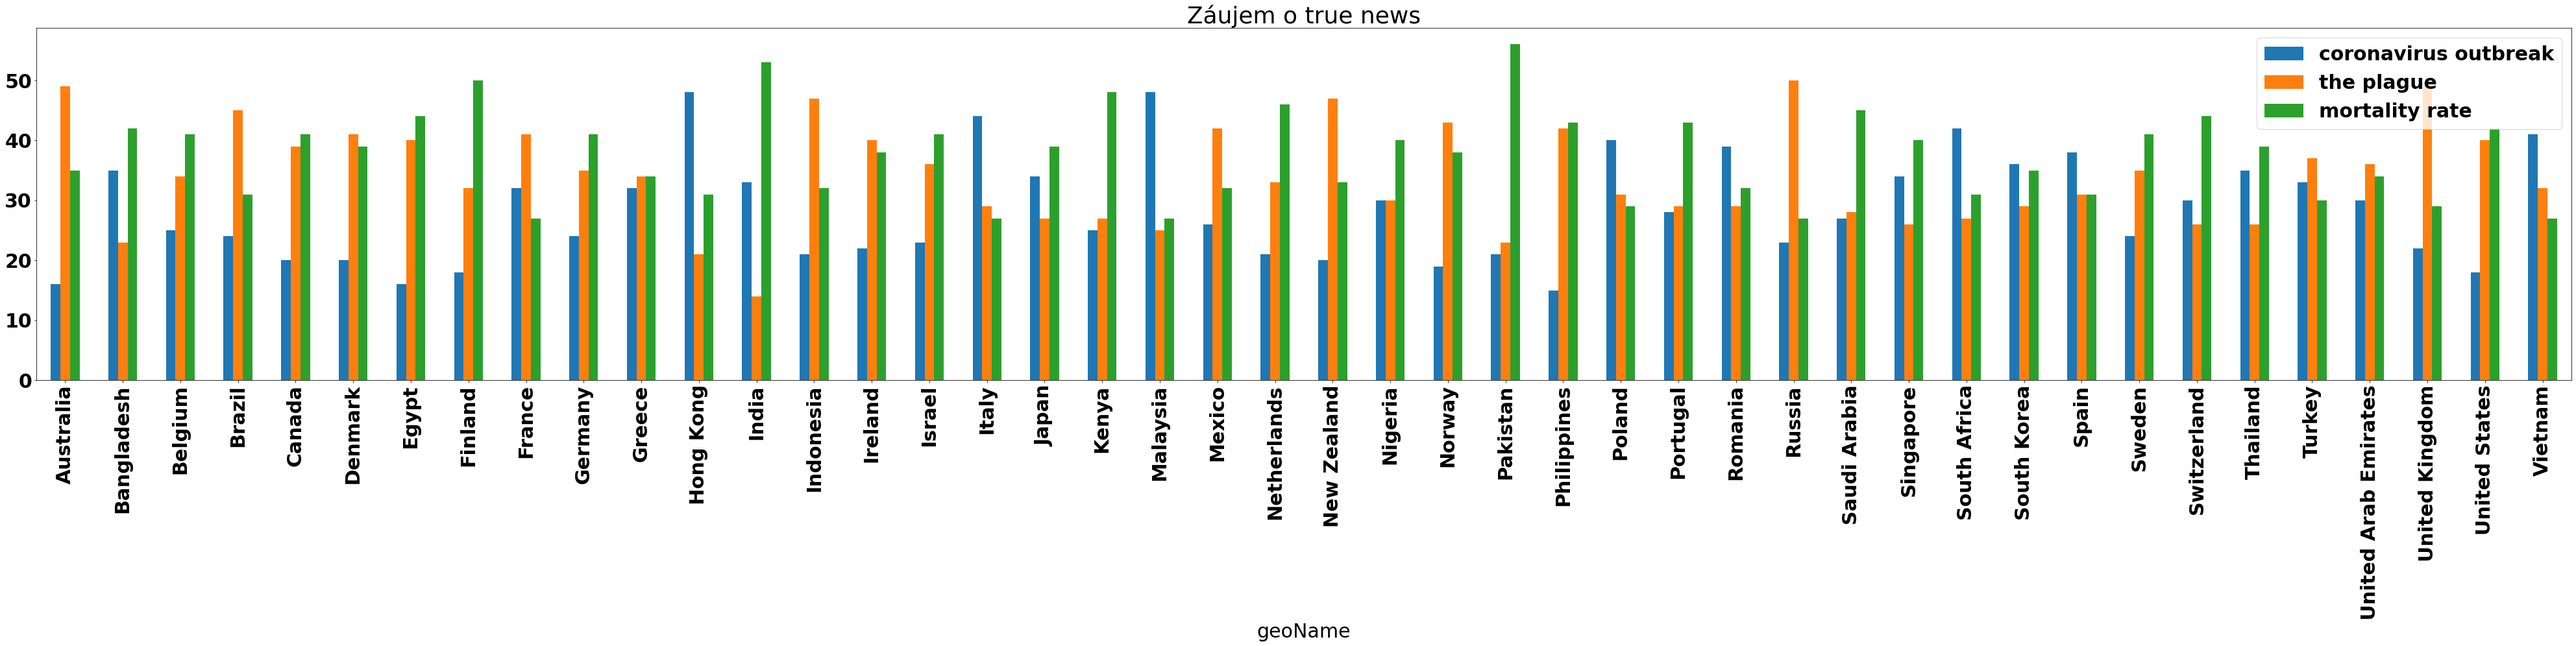

In [62]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}
plt.rc('font', **font)
region_t_1.plot(title="Záujem o true news",figsize=(70, 10), y=true_news, kind ='bar',width=0.5,)

In [ ]:
pd.options.plotting.backend = "plotly"

In [ ]:
fig = region_t_4["pandemic epidemic"].nlargest(10).plot.bar(width=700, height=500)
fig.show()